In [1]:
from pymongo import MongoClient
client=MongoClient(host="localhost",port=37017)
db=client["VnTrader_1Min_Db"]

In [2]:
collection=db["EOSETH:binance"]

In [3]:
data=list(collection.find())

In [4]:
import pandas as pd
data=pd.DataFrame(data)

In [5]:
data=data.drop("_id",axis=1)

In [6]:
data=data.set_index("datetime")

In [7]:
import matplotlib.pyplot as plt
import math
# data.close=data.close.map(lambda x:math.log(x))
plt.figure(figsize=(15,7))
mean=data.close.mean()
std=data.close.std()
up=mean+2*std
down=mean-2*std
length=len(data.close)
x=data.close.index
plt.plot(x,[mean]*length)
plt.plot(x,[up]*length)
plt.plot(x,[down]*length)
plt.plot(data.close)

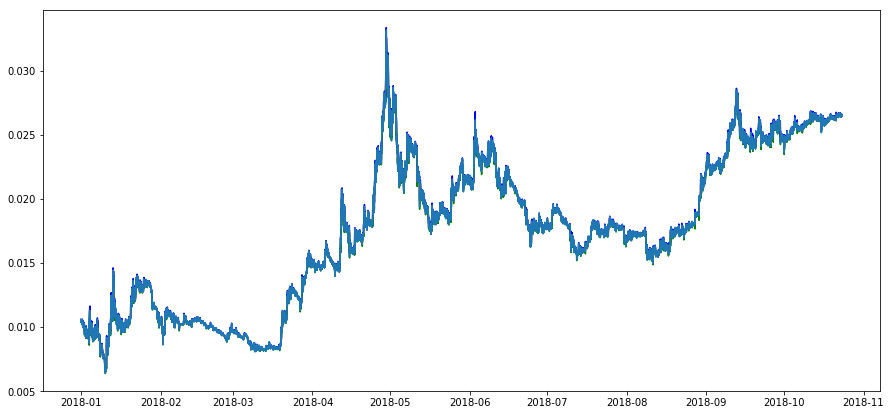

In [8]:
import matplotlib.pyplot as plt
import math
# data.close=data.close.map(lambda x:math.log(x))
plt.figure(figsize=(15,7))
mean=data.close.rolling(30).mean()
std=data.close.rolling(30).std()
up=mean+2*std
down=mean-2*std
plt.plot(mean,color="r")
plt.plot(up,color="b")
plt.plot(down,color="g")
# length=len(data.close)
# x=data.close.index
# plt.plot(x,[mean]*length)
# plt.plot(x,[up]*length)
# plt.plot(x,[down]*length)
plt.plot(data.close)

In [10]:
collection2=db["EOSUSDT:binance"]

In [11]:
EOSUSDT=list(collection2.find())

In [12]:
EOSUSDT=pd.DataFrame(EOSUSDT)

In [13]:
EOSUSDT=EOSUSDT.drop("_id",axis=1)

In [14]:
EOSUSDT=EOSUSDT.set_index("datetime")
index=EOSUSDT.index

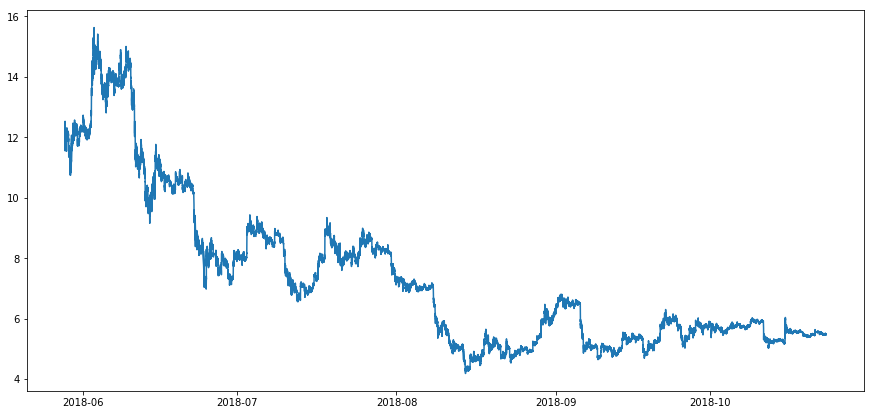

In [15]:
plt.figure(figsize=(15,7))
plt.plot(EOSUSDT.close)

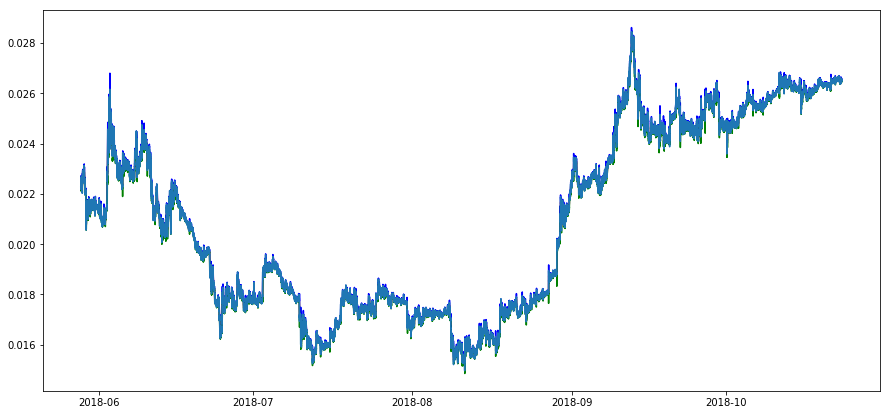

In [16]:
import matplotlib.pyplot as plt
import math
# data=data.loc[index,:]
# data.close=data.close.map(lambda x:math.log(x))
plt.figure(figsize=(15,7))
mean=data.close.rolling(30).mean()
std=data.close.rolling(30).std()
up=mean+2*std
down=mean-2*std
plt.plot(mean,color="r")
plt.plot(up,color="b")
plt.plot(down,color="g")
# length=len(data.close)
# x=data.close.index
# plt.plot(x,[mean]*length)
# plt.plot(x,[up]*length)
# plt.plot(x,[down]*length)
plt.plot(data.close)
# plt.plot(EOSUSDT.close)

In [17]:
from scipy.stats import spearmanr

In [18]:
interval=400000
data.close=data.close.fillna(0)
EOSUSDT.close=EOSUSDT.close.fillna(0)
print(spearmanr(data.close.values,EOSUSDT.close.values))
for i in range(interval,len(data)-interval,interval):
    print("%d/%d"%(i,len(data)))
    print(spearmanr(data.close.values[i-interval:i],EOSUSDT.close.values[i-interval:i]))

SpearmanrResult(correlation=-0.14923154837671732, pvalue=0.0)


In [19]:
data.close.values.shape

(211688,)

In [20]:
EOSUSDT.close.values.shape

(211688,)

In [23]:
# import numpy as np
# spearmanr(np.array([1,2,3,4]),np.array([3,4,5,6]))

In [21]:
collection3=db["ETHUSDT:binance"]
ETHUSDT=pd.DataFrame(list(collection3.find()))

In [23]:
ETHUSDT=ETHUSDT.drop("_id",axis=1).set_index("datetime")

In [39]:
spread=(ETHUSDT.close-EOSUSDT.close/data.close).dropna()

In [40]:
index=spread.index

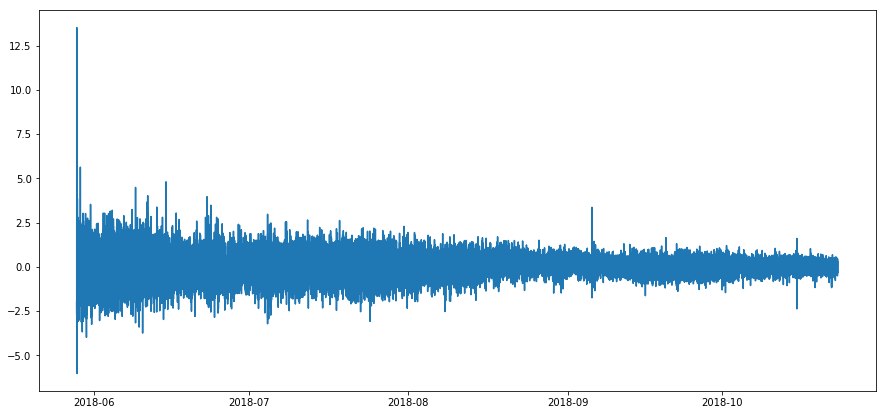

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(spread)

In [45]:
(1/data.close)

datetime
2018-05-28 13:00:00    44.847071
2018-05-28 13:01:00    44.708723
2018-05-28 13:02:00    44.648837
2018-05-28 13:03:00    44.638872
2018-05-28 13:04:00    44.736724
2018-05-28 13:05:00    44.668781
2018-05-28 13:06:00    44.666786
2018-05-28 13:07:00    44.670776
2018-05-28 13:08:00    44.650831
2018-05-28 13:09:00    44.662796
2018-05-28 13:10:00    44.543430
2018-05-28 13:11:00    44.501802
2018-05-28 13:12:00    44.595077
2018-05-28 13:13:00    44.553353
2018-05-28 13:14:00    44.565266
2018-05-28 13:15:00    44.529545
2018-05-28 13:16:00    44.531528
2018-05-28 13:17:00    44.547398
2018-05-28 13:18:00    44.595077
2018-05-28 13:19:00    44.640864
2018-05-28 13:20:00    44.626919
2018-05-28 13:21:00    44.620945
2018-05-28 13:22:00    44.736724
2018-05-28 13:23:00    44.742729
2018-05-28 13:24:00    44.742729
2018-05-28 13:25:00    44.543430
2018-05-28 13:26:00    44.505763
2018-05-28 13:27:00    44.503783
2018-05-28 13:28:00    44.579173
2018-05-28 13:29:00    44.589111
 